In [40]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'
os.chdir(proj_dir)


Mounted at /content/drive


In [41]:
trait = "Depression"
condition = 'Addiction Susceptibility'

In [42]:
!pip install sparse_lmm


In [43]:
data_root = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'

In [44]:
import gzip
import pandas as pd
import numpy as np
import os
import io


def read_gene_mapping_data(file_path):
    """ Process the metadata to get the mapping between gene names and gene probes.
    Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), so you need to use GB_ACC to search for the gene name in GeneBank website.
    """
    with gzip.open(file_path, 'rt') as f:
        contents = f.read()
    # Remove the lines that start with '^, '!', and '#'
    lines = contents.split('\n')
    filtered_lines = [line for line in lines if
                      not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
    filtered_content = '\n'.join(filtered_lines)
    mapping_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t', low_memory=False)
    # Find the name of the column that stores the gene symbol
    standardized_cols = mapping_data.columns.str.lower().str.replace(' ', '_')
    gene_symbol_cols = mapping_data.columns[standardized_cols == 'gene_symbol']
    assert len(gene_symbol_cols) == 1, f"Expected one 'gene_symbol' column, found {len(gene_symbol_cols)}"
    gene_symbol_col = gene_symbol_cols[0]
    mapping_data = mapping_data.loc[:, ['ID', gene_symbol_col]]
    mapping_data = mapping_data.dropna()

    return mapping_data


condition_metadata_path = os.path.join(data_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_family.soft.gz')
condition_gene_mapping = read_gene_mapping_data(condition_metadata_path)
condition_gene_mapping

,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
54630,AFFX-HUMGAPDH/M33197_M_at,GAPDH
54631,AFFX-HUMISGF3A/M97935_3_at,STAT1
54632,AFFX-HUMISGF3A/M97935_5_at,STAT1
54633,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [45]:
condition_data_path = os.path.join(data_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_data_path, compression='gzip', skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data



Gene Data:


,ID_REF,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,1007_s_at,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
1,1053_at,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
2,117_at,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
3,121_at,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
4,1255_g_at,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.515940,3.539705,3.584984,3.596067,3.545027,3.440291,3.752364,3.556127,3.589279,4.144625,4.043753,4.026245,4.142930,4.053573,4.124235,4.009781,4.088837,3.941025
54671,AFFX-ThrX-M_at,3.138104,3.219658,3.195710,3.306068,3.263290,3.198293,3.219658,3.219658,3.219658,3.410841,3.542287,3.602475,3.519912,3.402759,3.521458,3.617942,3.521458,3.521458
54672,AFFX-TrpnX-3_at,2.888776,2.943802,2.963034,3.027507,3.020854,3.027979,2.983401,2.882772,2.945647,3.221371,3.172050,3.242887,3.238628,3.309539,3.189017,3.226519,3.223271,3.306297
54673,AFFX-TrpnX-5_at,3.222764,3.248620,3.451505,3.463452,3.263041,3.230397,3.367256,3.256350,3.277619,3.700380,3.626289,3.569136,3.571794,3.657908,3.744095,3.768802,3.657908,3.635227


In [46]:
condition_gene_data = pd.merge(condition_gene_mapping.rename(columns={'ID': 'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Gene Symbol,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
rfc2,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
hspa6,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
pax8,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
guca1a,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.285210,13.181778,13.174343,13.311560,13.241798,13.246569,13.221085,13.184927,13.215046,13.374165,13.402090,13.329721,13.416237,13.430297,13.349765,13.367505,13.433381,13.352209
stat1,9.578593,9.149700,9.013328,9.186798,9.053712,8.966410,9.365567,8.978912,8.947200,9.551512,9.547468,9.196738,9.513483,9.441670,9.265777,9.473402,9.538221,9.243079
stat1,4.103462,3.867484,3.751517,4.012691,3.932820,3.855030,4.151565,4.022652,4.155426,4.654129,4.702240,4.519354,4.754346,4.713375,4.512929,4.857638,4.743431,4.673550


In [47]:
trait_metadata_path = os.path.join(data_root, '83_Gene_BDNF_Trait_Depression/GSE38311/GSE38311_family.soft.gz')
trait_gene_mapping = read_gene_mapping_data(trait_metadata_path)
trait_gene_mapping


,ID,Gene Symbol
0,1415670_at,Copg1
1,1415671_at,Atp6v0d1
2,1415672_at,Golga7
3,1415673_at,Psph
4,1415674_a_at,Trappc4
...,...,...
22658,AFFX-PyruCarbMur/L09192_MA_at,Pcx
22659,AFFX-PyruCarbMur/L09192_MB_at,Pcx
22684,AFFX-TransRecMur/X57349_3_at,Tfrc
22685,AFFX-TransRecMur/X57349_5_at,Tfrc


In [48]:
trait_data_path = os.path.join(data_root, '83_Gene_BDNF_Trait_Depression/GSE38311/GSE38311_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_data_path, compression='gzip', skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data



Gene Data:


,ID_REF,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,1415670_at,418.5,317.8,679.0,622.3,626.8
1,1415671_at,335.6,446.4,616.6,806.0,680.8
2,1415672_at,382.8,221.4,362.5,311.4,460.6
3,1415673_at,66.7,40.4,52.2,49.1,66.9
4,1415674_a_at,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...,...
22685,AFFX-TransRecMur/X57349_5_at,81.4,62.5,62.4,110.9,88.1
22686,AFFX-TransRecMur/X57349_M_at,10.6,9.7,24.8,54.2,50.3
22687,AFFX-TrpnX-3_at,4.1,0.3,0.7,1.9,0.8
22688,AFFX-TrpnX-5_at,3.6,4.1,6.4,4.0,4.1


In [49]:
trait_gene_data = pd.merge(trait_gene_mapping.rename(columns={'ID': 'ID_REF'}), trait_gene_data, on='ID_REF').drop(
    columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Gene Symbol,,,,,
copg1,418.5,317.8,679.0,622.3,626.8
atp6v0d1,335.6,446.4,616.6,806.0,680.8
golga7,382.8,221.4,362.5,311.4,460.6
psph,66.7,40.4,52.2,49.1,66.9
trappc4,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...
pcx,2.9,17.9,2.1,12.4,8.0
pcx,5.6,2.7,1.0,2.5,3.3
tfrc,22.0,29.3,30.5,53.8,49.7


In [50]:
trait_gene_rel_path = os.path.join(os.path.dirname(data_root), 'Summary_Corresponding_Gene_Symbol.csv')

trait_gene_rel = pd.read_csv(trait_gene_rel_path)
trait_gene_rel = trait_gene_rel.loc[:, ['Trait name', 'Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
trait_gene_rel = trait_gene_rel.apply(lambda x: x.astype(str).str.lower())
trait_gene_rel.index = trait_gene_rel.index.str.lower()
trait_gene_rel

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


In [51]:
condition_related_genes = trait_gene_rel.loc[condition.lower()].tolist()[0].lower().strip().split(',')
condition_related_genes = [gn.strip() for gn in condition_related_genes]
print(f"Genes related to the condition '{condition}' according to domain knowledge, {condition_related_genes}")

Genes related to the condition 'Addiction Susceptibility' according to domain knowledge, ['faah', 'chrna4', 'cyp2a6', 'hla-b', 'htr2a', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']


In [52]:
genes_in_condition_data = condition_gene_data.index.tolist()
genes_in_trait_data = trait_gene_data.index.tolist()

common_genes_condition = set(condition_related_genes).intersection(genes_in_condition_data)
if len(common_genes_condition) == 0:
    print("No candidate genes found in the dataset for the condition '{CONDITION}'.")
else:
    common_genes = set(genes_in_trait_data).intersection(common_genes_condition)
    if len(common_genes) > 0:
        gene_regressors_for_condition = list(common_genes)
        print(f"The trait and condition datasets contain {len(common_genes)} candidate genes in common, such as {gene_regressors_for_condition[:10]}. Therefore, the data can be used for the two-stage regression analysis. ")
    else:
        print(f"The condition and trait datasets do not have candidate genes in common")


The trait and condition datasets contain 7 candidate genes in common, such as ['chrna4', 'nos3', 'faah', 'tnf', 'ifngr1', 'aldh2', 'mthfr']. Therefore, the data can be used for the two-stage regression analysis. 


In [53]:
# Read clinical information to get the trait. Note that clear understanding on this information is necessary.
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
        contents = f.read()
    lines = contents.split('\n')
    for line in lines:
        line = line.strip()
        for prefix in prefixes:
            if line.startswith(prefix):
                filtered_lines.append(line)
                break
    return filtered_lines

candidate_prefixes = ['!Sample_geo_accession', '!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']

def read_background_information(file_path, prefixes):
    filtered_lines = extract_lines_with_prefix(file_path, prefixes)
    filtered_content = '\n'.join(filtered_lines)
    return filtered_content

trait_filtered_content = read_background_information(trait_data_path, candidate_prefixes)
print(trait_filtered_content)

!Series_title	"Expression of ventromedial hypothalamus (VMH) from electroconvulsive seizure (ECS) treated C57Bl/6 mice"
!Series_summary	"The ventromedial nucleus of the hypothalamus (VMH) is thought to a satiety center and a potential target for anti-obesity therapy. Electroconvulsive seizure (ECS) therapy is highly effective in psychiatric diseases including depression, but also implicated beneficial effects on other neurological diseases. Although it has been reported that the neurons in the VMH are strongly activated by ECS stimulation, the effect of ECS in this hypothalamic subnucleus remains unknown. To address this issue, we investigated molecular changes in the VMH in response to ECS by utilizing a method of laser-capture microdissection coupled with microarray analysis, and examined behavioral effects of ECS via VMH activation. ECS significantly induced gene expression not only immediate-early genes such as Fos, Fosb and Jun, but also Bdnf, Adcyap1, and Hrh1 in the VMH after a 

In [54]:
def filter_label_info(file_path, prefixes):
    filtered_lines = extract_lines_with_prefix(file_path, prefixes)
    filtered_content = '\n'.join(filtered_lines)
    clinical_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t', low_memory=False)
    return clinical_data

prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_clinical_data = filter_label_info(trait_data_path, prefixes)
trait_clinical_data

,!Sample_geo_accession,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,!Sample_characteristics_ch1,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6
1,!Sample_characteristics_ch1,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus
2,!Sample_characteristics_ch1,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [55]:
def add_and_convert_label(gene_data, clinical_data, row_id, label_name, mapping_dict):
    clinical_data = clinical_data.iloc[row_id:row_id+1, 1:]
    clinical_data.index = [label_name]
    merged_data = pd.concat([gene_data, clinical_data])
    # Convert labels to integers
    merged_data.loc[label_name] = merged_data.loc[label_name].replace(mapping_dict)
    # Drop columns where the TRAIT row is not 0 or 1
    mask = merged_data.loc[label_name].isin([0, 1])
    merged_data = merged_data.loc[:, mask]
    merged_data = merged_data.astype(float).T
    # Delete duplicate column names and save only one of the columns
    merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]
    return merged_data

In [56]:
trait_row_id = 2
trait_mapping_dict = {
    "treatment: no shock, brain collected after 2hrs": 0,
    "treatment: 1 shock and brain collected after 2hrs": 1,
    "treatment: 1 shock and brain collected after 6hrs": 1,
    "treatment: 7 shocks and brain collected after 2hrs": 1,
    "treatment: 7 shocks and brain collected after 6hrs": 1

}
trait_merged_data = add_and_convert_label(trait_gene_data, trait_clinical_data, trait_row_id, trait, trait_mapping_dict)



In [57]:
trait_merged_data


,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,psenen,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,126.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,0.0
GSM938861,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,289.1,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,1.0
GSM938862,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,265.7,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,1.0
GSM938863,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,230.9,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,1.0
GSM938864,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,332.2,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,1.0


In [58]:
condition_filtered_content = read_background_information(condition_data_path, candidate_prefixes)
print(condition_filtered_content)

!Series_title	"Expression data of SHSY5Y cells after cocaine exposure"
!Series_summary	"The aim of the study was to evaluate cocaine-induced changes in gene expression in a dopaminergic model."
!Series_summary	"Cocaine reward and reinforcing effects are mediated mainly by dopaminergic neurotransmission. In this study we aimed at evaluating gene expression changes induced by acute cocaine exposure on SH-SY5Y differentiated cells, which have been widely used as a dopaminergic neuronal model. Expression changes and a concomitant increase in neuronal activity were observed 6 hours after a 5 uM cocaine exposure, whereas no changes in gene expression nor in neuronal activity took place at 1 uM cocaine. A total of 756 differentially expressed genes, mainly related to regulation of transcription and gene expression, cell cycle, adhesion and cell projection, as well as MAPK, CREB, neurotrophin and neuregulin signaling pathways. Genes displaying altered expression were subsequently targeted with

In [59]:
condition_clinical_data = filter_label_info(condition_data_path, prefixes)
condition_clinical_data

,!Sample_geo_accession,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,!Sample_characteristics_ch1,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA
1,!Sample_characteristics_ch1,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [60]:
condition_row_id = 1
condition_mapping_dict = {
    "treatment: 6 hours after a 30-min exposure to 5uM cocaine (non-treated control)": 1,
    "treatment: 6 hours after a 30-min exposure to 1uM cocaine": 1,
    "treatment: 24 hours after a 30-min exposure to 1uM cocaine": 1,
    "treatment: 24 hours after a 30-min exposure to 5uM cocaine (non-treated control)": 1,
    "treatment: 6 hours after a 30-min exposure to 0uM cocaine (non-treated control)": 0,
    "treatment: 6 hours after a 30-min exposure to 0uM cocaine (non-treated control)": 0,
    "treatment: 24 hours after a 30-min exposure to 0uM cocaine (non-treated control)": 0


}
condition_merged_data = add_and_convert_label(condition_gene_data, condition_clinical_data, condition_row_id, condition, condition_mapping_dict)



In [61]:
condition_merged_data


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,minos1-nbl1 /// nbl1,nus1p3,mroh7-ttc4 /// ttc4,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,Addiction Susceptibility
GSM1847671,9.301571,9.355880,3.859333,6.970233,8.209672,5.267003,6.203201,4.820422,3.283581,3.322803,...,8.638197,4.075669,8.971633,7.055363,8.385405,7.985968,7.141755,6.462949,4.372719,0.0
GSM1847672,9.318660,9.318865,3.680735,6.958087,7.915630,5.499268,6.066693,4.396142,3.241279,3.170915,...,8.451719,3.738261,8.916208,6.881315,8.346264,7.932352,6.913519,5.854219,4.642532,0.0
GSM1847673,9.242146,9.302872,3.750826,6.927173,7.548595,5.194871,5.677855,4.802796,3.259909,3.159695,...,8.202712,3.733964,8.904916,6.905103,8.250712,7.847859,6.881319,6.079474,4.656043,0.0
GSM1847674,9.331954,9.498672,3.644128,6.940049,8.312109,5.275548,6.157769,4.936201,3.445220,3.335448,...,8.765693,3.811545,8.873030,7.063075,8.381406,8.115656,6.950610,6.275966,4.370201,1.0
GSM1847675,9.359714,9.511966,3.677574,6.945966,7.950794,5.284060,6.139246,4.641787,3.350858,3.173760,...,8.472918,3.922352,8.906366,6.962384,8.377947,8.097283,6.891617,6.168075,4.600634,1.0
GSM1847676,9.306307,9.512039,3.680365,7.024712,7.756521,5.275548,6.096643,4.571559,3.555742,3.255437,...,8.292676,3.723412,8.961375,6.785115,8.187670,7.994450,6.905474,6.146526,4.544547,1.0
GSM1847677,9.229553,9.354713,3.632442,6.886061,8.292259,5.271298,6.309683,4.641787,3.352866,3.103155,...,8.621234,4.152517,8.882111,6.981661,8.565476,7.959883,6.870517,6.468227,4.382117,1.0
GSM1847678,9.414227,9.461574,3.697364,6.873566,7.939931,5.248594,6.323641,4.625939,3.269484,3.313365,...,8.464476,3.984392,8.866079,6.759388,8.421624,8.022619,6.893076,6.348633,4.404102,1.0
GSM1847679,9.304896,9.447276,3.740293,6.812068,7.727716,5.219657,6.320291,4.800101,3.423263,3.416917,...,8.169479,4.138459,8.888374,6.861270,8.521701,7.975107,6.875629,6.307501,4.296765,1.0
GSM1847680,9.385627,9.784995,4.139292,7.316451,8.535836,5.992363,6.472779,5.287749,3.713551,3.648829,...,8.735832,4.376423,9.092333,7.064813,8.584640,8.129650,6.927928,6.640506,5.026877,0.0


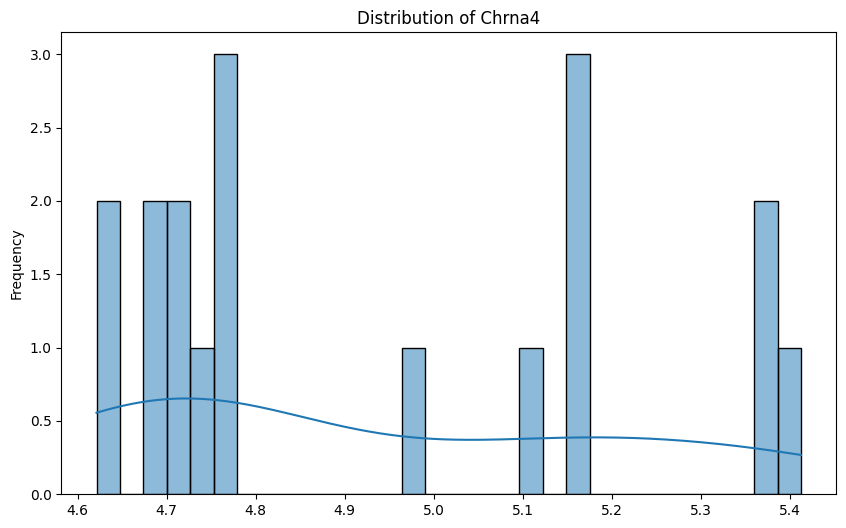

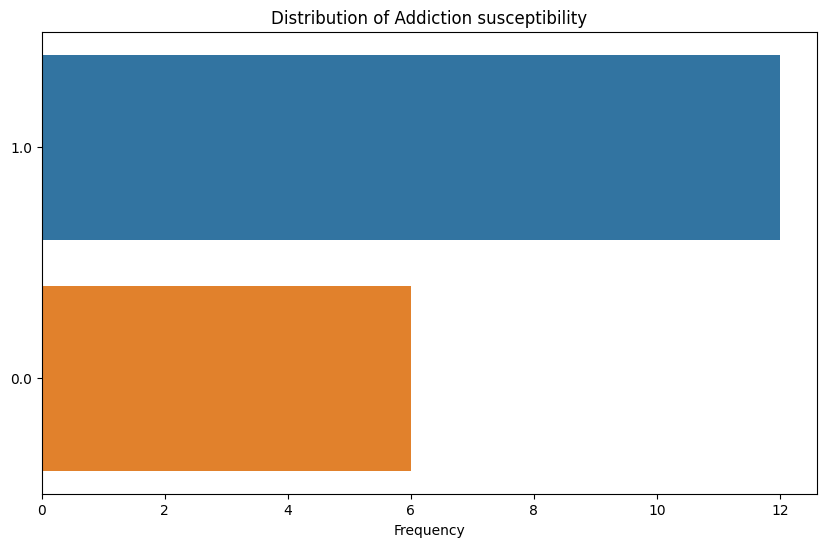

In [62]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]]  # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt


def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()


def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()


def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)


# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[*gene_list], categorical_columns=[condition])


In [63]:
def normalize_data(X_train, X_test=None):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Handling columns with std = 0
    std_no_zero = np.where(std == 0, 1, std)

    # Normalize X_train
    X_train_normalized = (X_train - mean) / std_no_zero
    # Set normalized values to 0 where std was 0
    X_train_normalized[:, std == 0] = 0

    if X_test is not None:
        X_test_normalized = (X_test - mean) / std_no_zero
        X_test_normalized[:, std == 0] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized



In [64]:
from sklearn.linear_model import LogisticRegression

# k-fold cross-validation for the linear regression model used for prediction
def cross_validation_for_prediction(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = normalize_data(X_train, X_test)

        # Use the LogisticRegression model to train and predict
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)


X_condition = condition_merged_data[gene_regressors_for_condition].values
y_condition = condition_merged_data[condition].values

X_condition, _ = normalize_data(X_condition)
print(cross_validation_for_prediction(X_condition, y_condition))



0.3333333333333333


In [65]:
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
X_condition = condition_merged_data[gene_regressors_for_condition].values
y_condition = condition_merged_data[condition].values

X_condition, _ = normalize_data(X_condition)

model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)
# Implementing k-fold cross-validation


Common gene regressors for condition and trait ['chrna4', 'nos3', 'faah', 'tnf', 'ifngr1', 'aldh2', 'mthfr']


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [66]:
# Select relevant columns and convert to numpy array
X_new_regressors = trait_merged_data[gene_regressors_for_condition].values
X_old_regressors = condition_merged_data[gene_regressors_for_condition].values
# Use the statistics of common genes in the condition dataset, to account for possible distribution shifts in the trait dataset
X_old_regressors, X_new_regressors = normalize_data(X_old_regressors, X_new_regressors)

predictions_condition = model.predict_proba(X_new_regressors)[:, 1]


In [67]:
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data


,Addiction Susceptibility,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,3.638719e-232,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,0.0
GSM938861,1.136267e-230,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,1.0
GSM938862,1.090776e-302,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,1.0
GSM938863,3.739197e-184,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,1.0
GSM938864,0.000000e+00,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,1.0


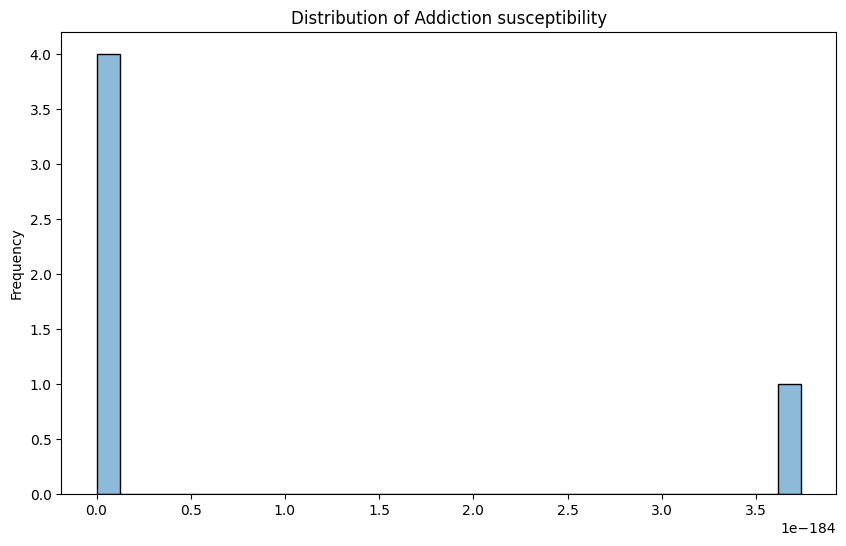

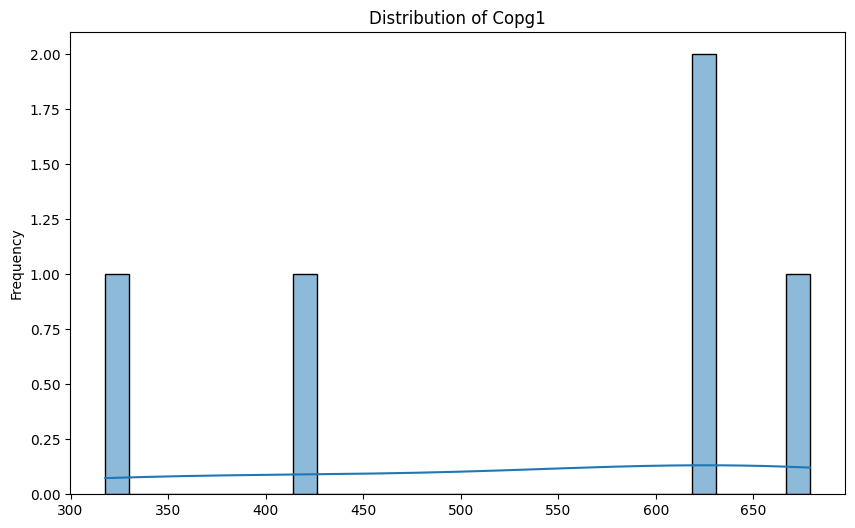

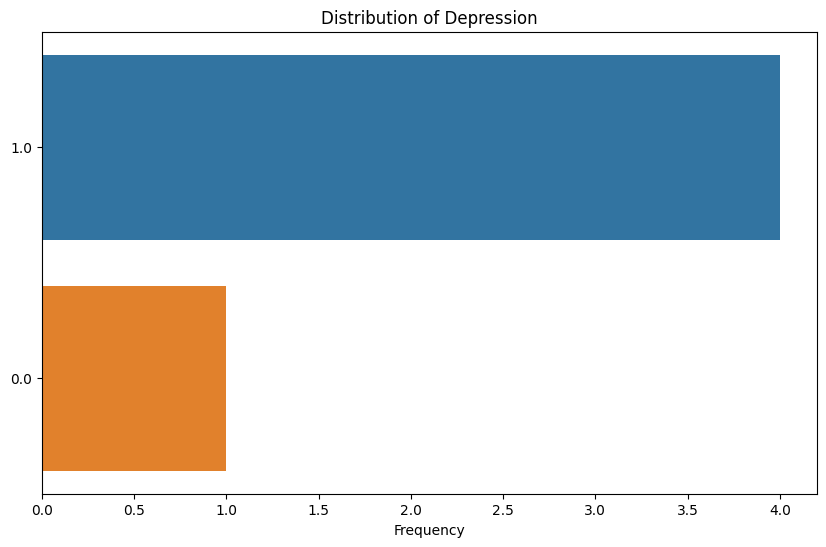

In [68]:
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]]

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition, *gene_list], categorical_columns=[trait])



In [69]:
from sparse_lmm import VariableSelection

# k-fold cross-validation for the variable selection model
def cross_validation_for_var_select(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = normalize_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
cv_mean, cv_std = cross_validation_for_var_select(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')


/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 80.00% ± 40.00%


In [70]:
trait_merged_data


,Addiction Susceptibility,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,3.638719e-232,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,0.0
GSM938861,1.136267e-230,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,1.0
GSM938862,1.090776e-302,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,1.0
GSM938863,3.739197e-184,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,1.0
GSM938864,0.000000e+00,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,1.0


In [71]:
var_select = VariableSelection()

X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
X_trait, _ = normalize_data(X_trait)

# Fit the model
var_select.fit(X_trait, y_trait)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]


/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [72]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': trait_feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: Addiction Susceptibility
Coefficient: 0.0000
p-value: 1



In [73]:
threshold = 0.4

# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(
    f"Genes affecting the trait '{trait}' conditional on the factor '{condition}', with corrected p-value < {threshold}:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")


Genes affecting the trait 'Depression' conditional on the factor 'Addiction Susceptibility', with corrected p-value < 0.4:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Variable  Coefficient  corrected_p_value
                                                                                                                                                                                                                                                     